In [37]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from mapseq_fxns import * # import all functions from this script
# from math import log10
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
from scipy.stats import mannwhitneyu # nonparametric test
import random


%matplotlib inline

In [38]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/output/'

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp


In [40]:
#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

In [41]:
# seperate by cell type

omc_type = [sort_by_celltype(omc_countN[i]) for i in range(num_samples)]

# clean-up datasets here
omc_clean = []
for i in range(num_samples):
    omc_clean.append(clean_up_data(omc_type[i]))


omc_pt = [(omc_clean[i][omc_clean[i]['type']=="PT"]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]
omc_it = [(omc_clean[i][omc_clean[i]['type']=="IT"]).drop(["type"], axis=1).reset_index(drop=True) for i in range(num_samples)]



/Users/eisko/github_repos/MAPseq_analysis/mapseq_fxns.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nodes = replaced.drop(["OMCi"], axis=1).sum(axis=1)
/Users/eisko/github_repos/MAPseq_analysis/mapseq_fxns.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nodes = replaced.drop(["OMCi"], axis=1).sum(axis=1)
/Users/eisko/github_repos/MAPseq_analysis/mapseq_fxns.py:88: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nodes = replaced.drop(["OMCi"], axis=1).sum(axis=1)
/Users/eisko/

In [42]:

omc_mm = []
omc_st = []
omc_pt_mm = []
omc_pt_st = []
omc_it_mm = []
omc_it_st = []
mice_mm=[]
mice_st=[]
dataset_mm = []
dataset_st = []

for i in range(num_samples):
    if metadata.species[i] == 'MMus':
        omc_mm.append(omc_clean[i])
        omc_pt_mm.append(omc_pt[i])
        omc_it_mm.append(omc_it[i])
        mice_mm.append(mice[i])
        dataset_mm.append(dataset[i])
    else:
        omc_st.append(omc_clean[i])
        omc_pt_st.append(omc_pt[i])
        omc_it_st.append(omc_it[i])
        mice_st.append(mice[i])
        dataset_st.append(dataset[i])

omc_mm_all = pd.concat(omc_mm)
omc_st_all = pd.concat(omc_st)

# histograms

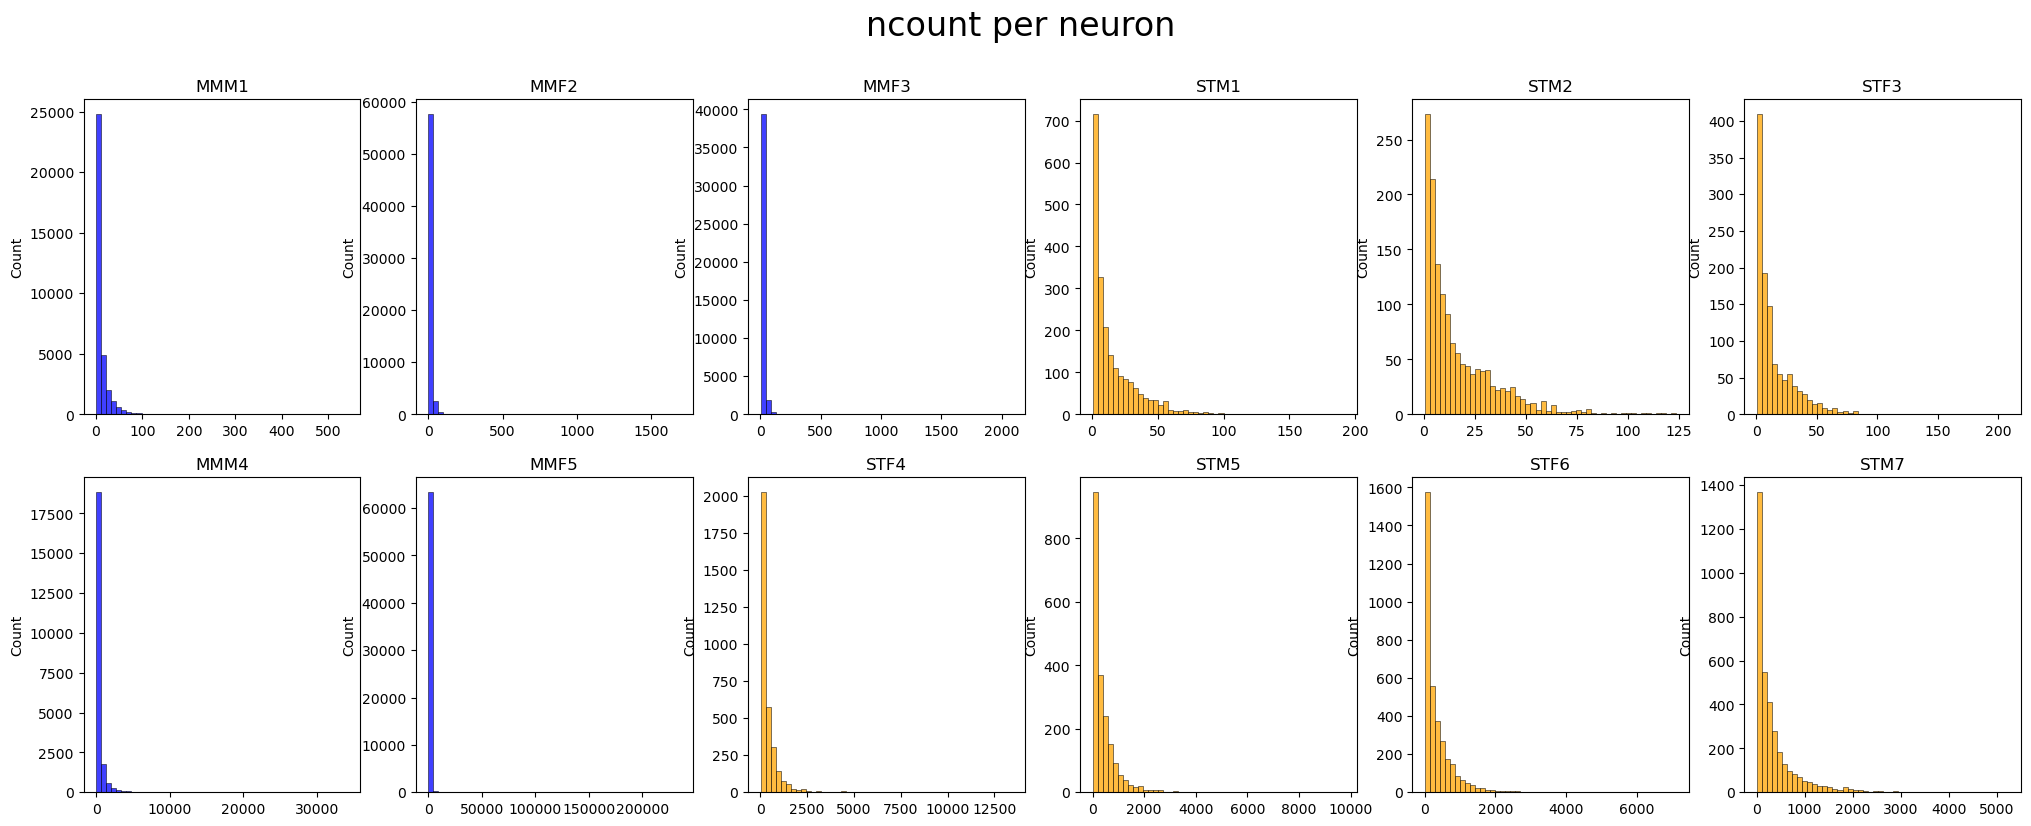

In [100]:
# left out type
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    df = omc_clean[i].drop(["type"], axis=1)
    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    # plot[plot > 5000] = 5000
    sns.histplot(plot, bins = 50, legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    # ax.set_xlim(0,5000)
    i+=1
fig.suptitle("ALL - ncount per neuron", size=24)
plt.show()

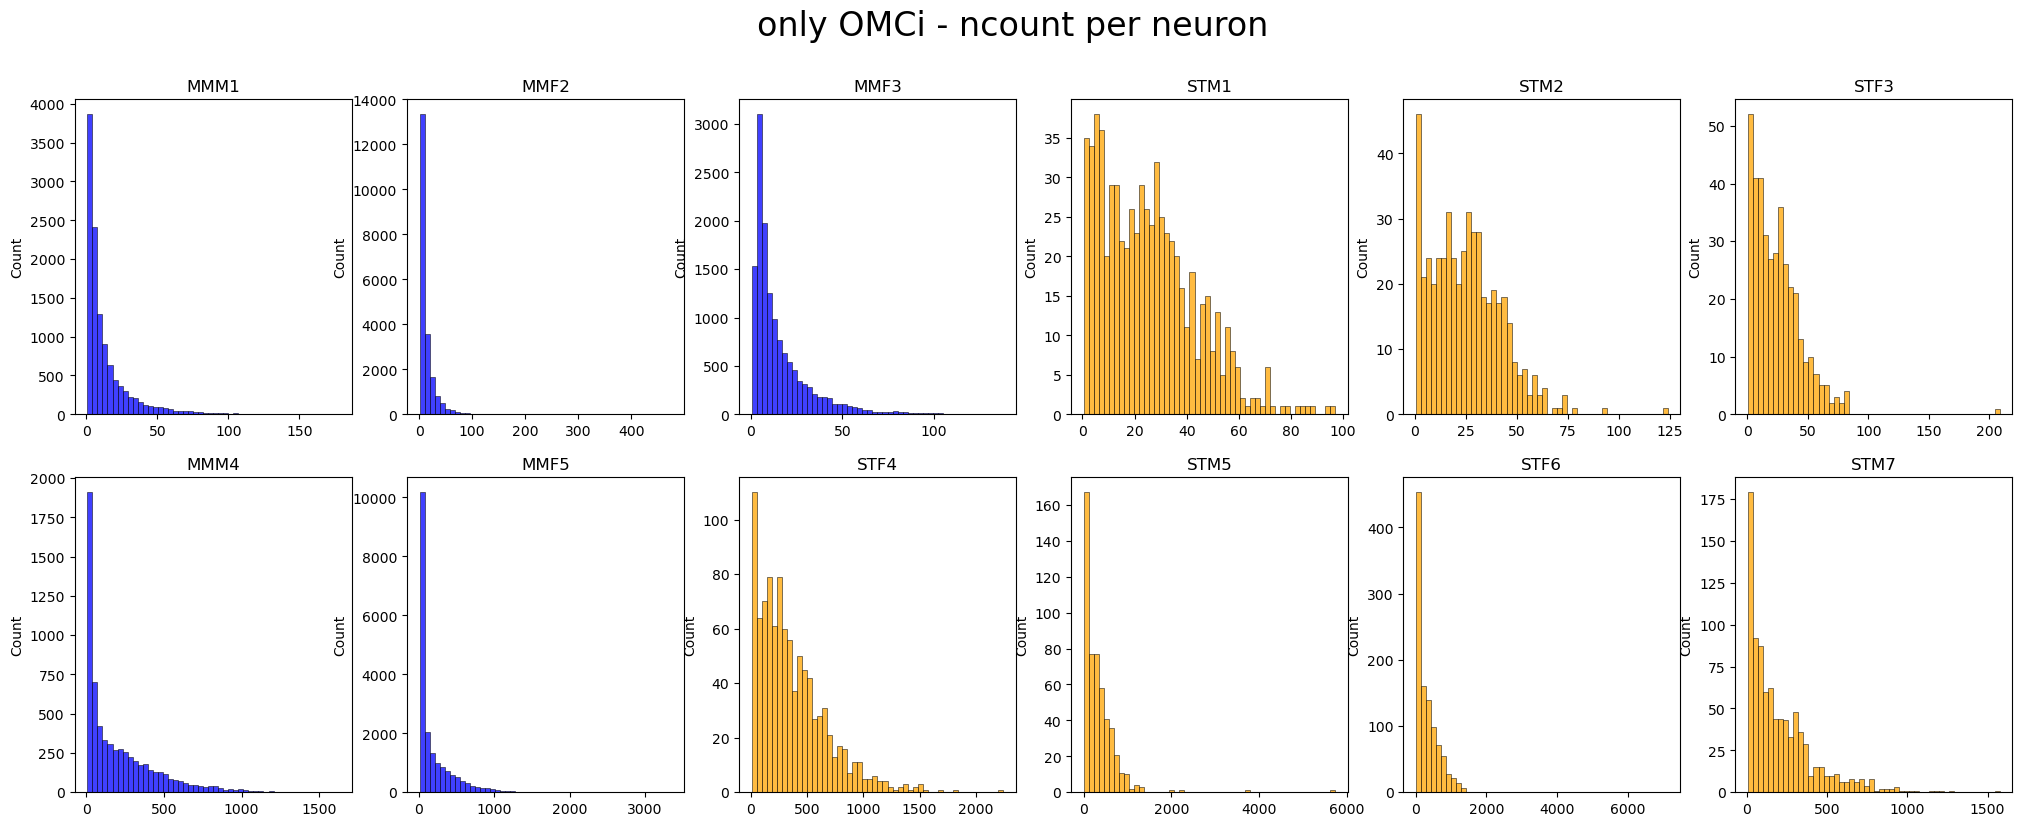

In [102]:
# left out type
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    df = omc_clean[i]["OMCi"]
    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    # plot[plot > 5000] = 5000
    sns.histplot(plot, bins = 50, legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    # ax.set_xlim(0,5000)
    i+=1
fig.suptitle("only OMCi - ncount per neuron", size=24)
plt.show()

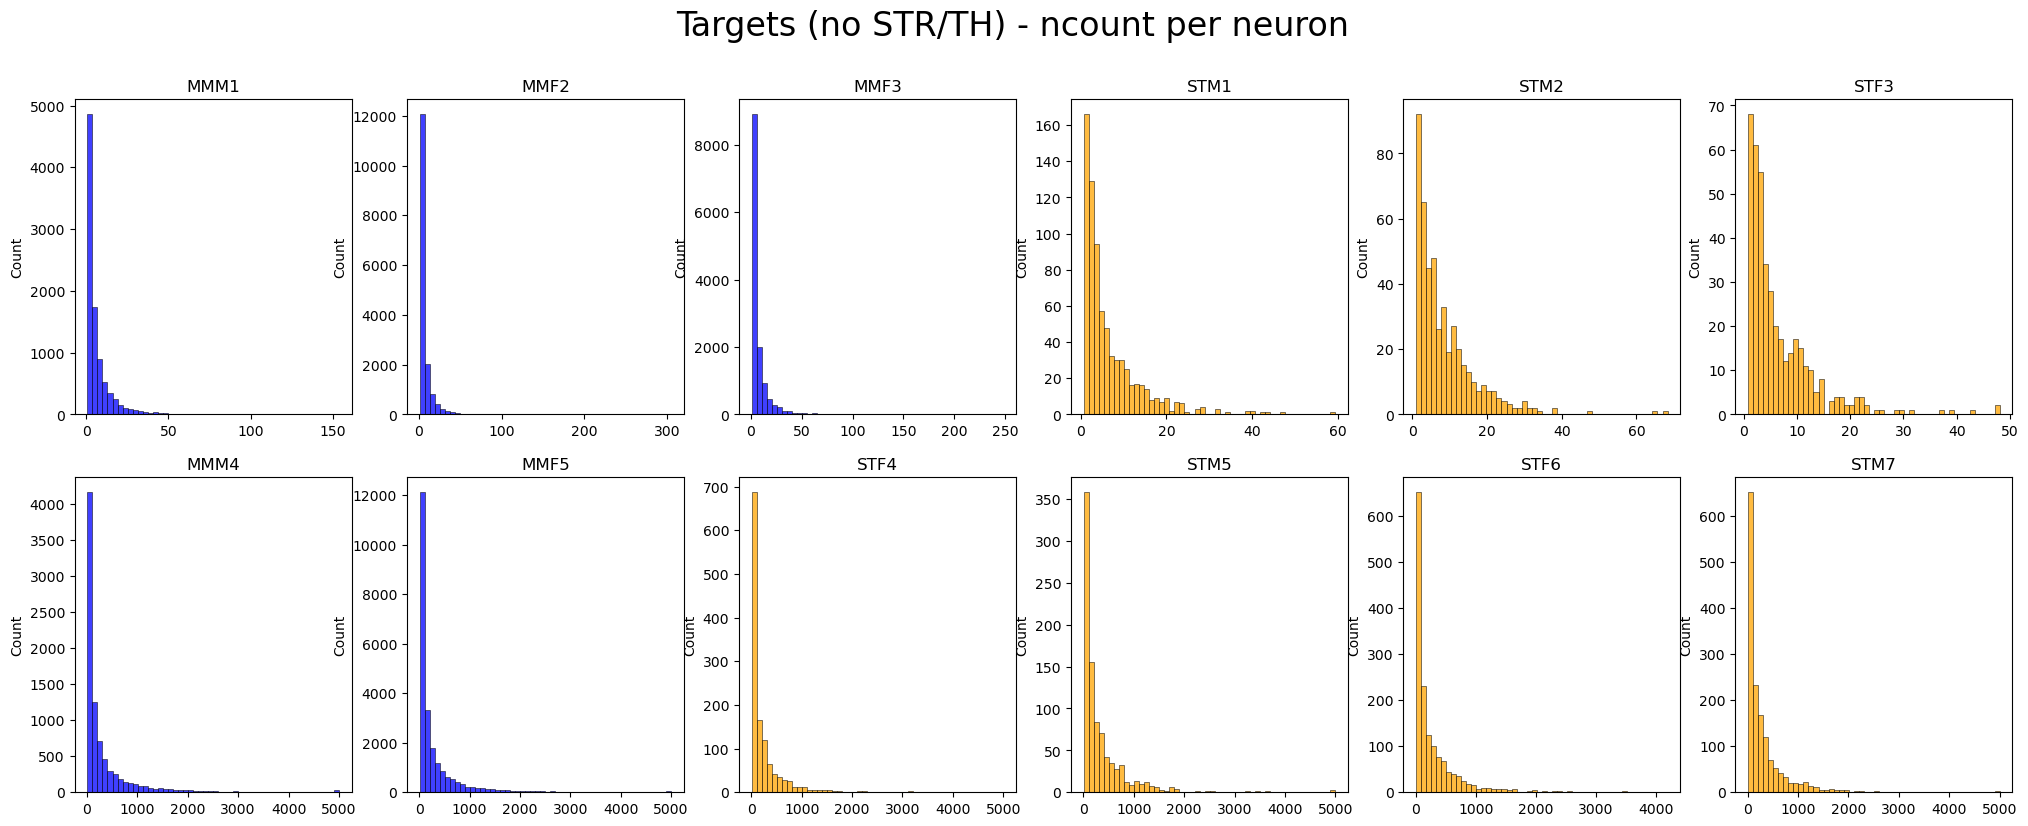

In [111]:
# normalize by total barcode counts per animal
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    df = omc_clean[i].drop(["OMCi", "STR", "TH", "type"], axis=1)
    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    plot[plot > 5000] = 5000
    sns.histplot(plot, bins = 50, legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    # ax.set_xlim(0,5000)
    i+=1
fig.suptitle("Targets (no STR/TH) - ncount per neuron", size=24)
plt.show()

In [115]:
display(df/tot)
display(df/tot*10000)

,OMCc,AUD,HY,AMY,SNr,SCm,PG,PAG,BS
0,0.008475,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,0.007363,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,0.006239,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,0.005900,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,0.005442,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
889,0.000000,0.0,0.000000,0.0,0.000071,0.000165,0.000058,0.0,0.000000
890,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000067
891,0.000000,0.0,0.000049,0.0,0.000097,0.000052,0.000074,0.0,0.000000
892,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000091


,OMCc,AUD,HY,AMY,SNr,SCm,PG,PAG,BS
0,84.749992,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,73.633781,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,62.385589,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,58.995607,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,54.415184,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
889,0.000000,0.0,0.000000,0.0,0.707921,1.654223,0.578978,0.0,0.000000
890,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.669389
891,0.000000,0.0,0.490264,0.0,0.973391,0.516945,0.744400,0.0,0.000000
892,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.912803


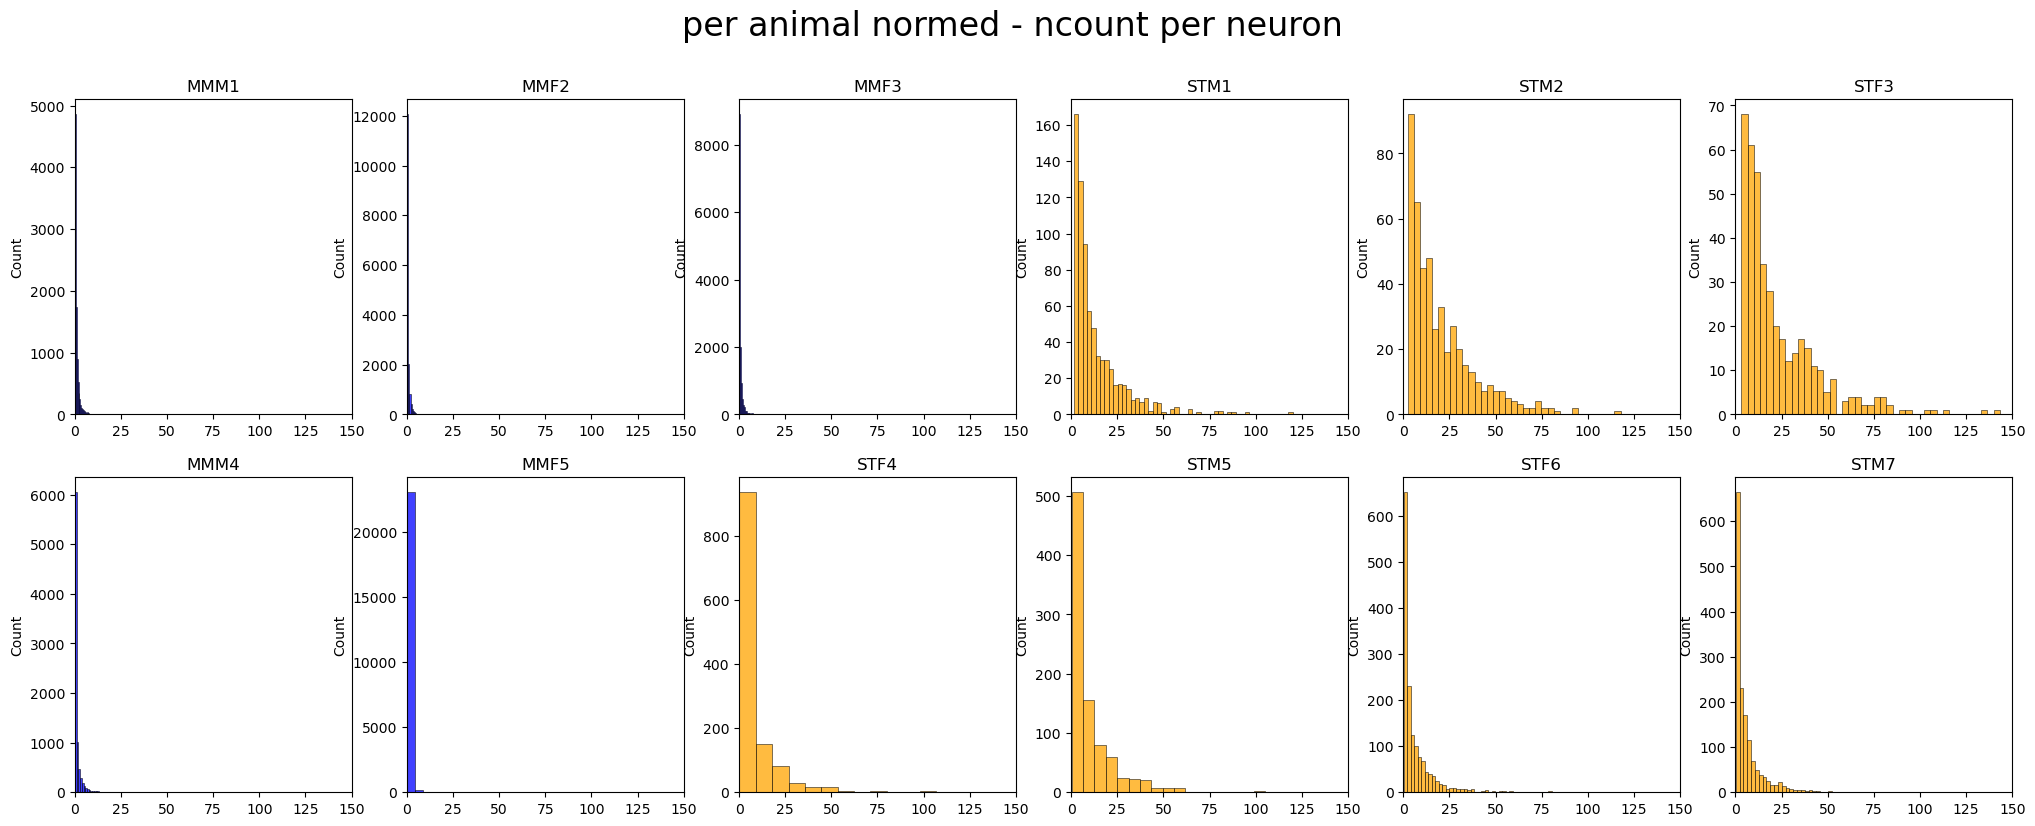

In [118]:
# left out type
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    dfi = omc_clean[i].drop(["OMCi", "STR", "TH", "type"], axis=1)

    # set cut-off for outliers at 5000
    df[df > 5000] = 5000

    # divide matrix by total BC counts
    total_bc = dfi.sum().sum()
    df = dfi/total_bc * 10000 # scale up so numbers are reasonable

    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    # plot[plot > 5000] = 5000
    sns.histplot(plot, bins = 50, legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    ax.set_xlim(0,150)
    i+=1
fig.suptitle("per animal normed select targets - ncount per neuron", size=24)
plt.show()

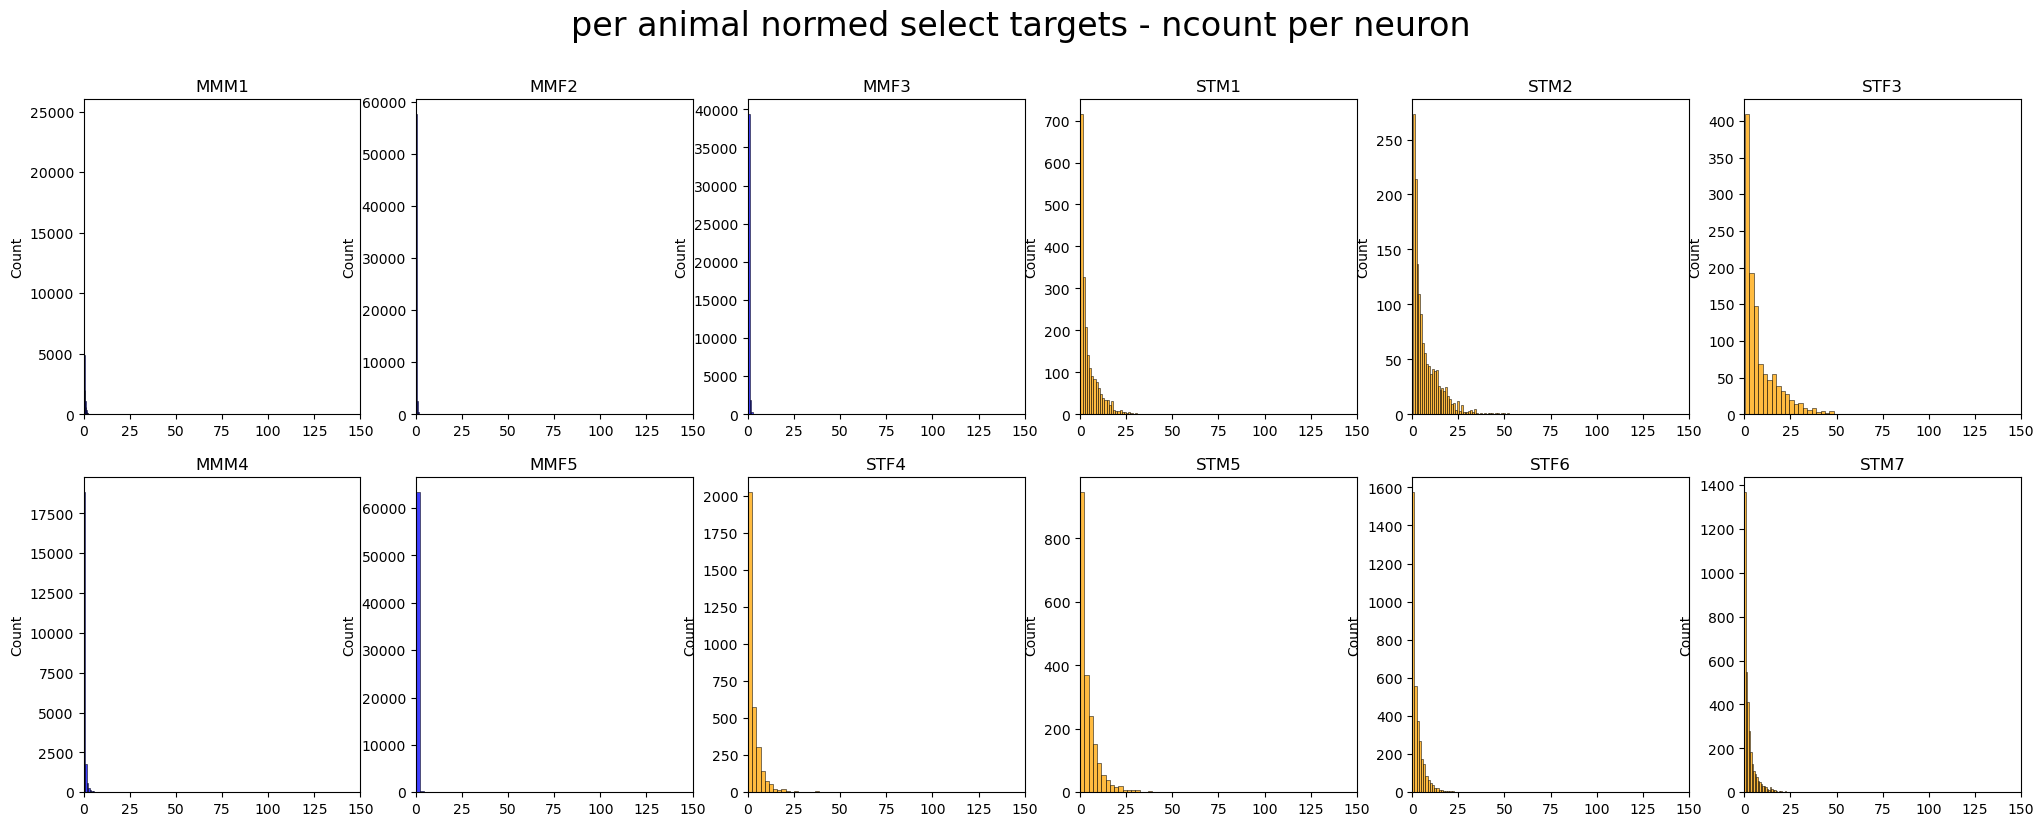

In [119]:
# left out type
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    dfi = omc_clean[i].drop(["type"], axis=1)

    # normalized by OMCi
    df = dfi/dfi["OMCi"]

    # set cut-off for outliers at 5000
    # df[df > 5000] = 5000

    # divide matrix by total BC counts
    total_bc = dfi.sum().sum()
    df = dfi/total_bc * 10000 # scale up so numbers are reasonable

    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    # plot[plot > 5000] = 5000
    sns.histplot(plot, bins = 50, legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    ax.set_xlim(0,150)
    i+=1
fig.suptitle("per animal normed all areas - ncount per neuron", size=24)
plt.show()

In [125]:
df = omc_clean[0].drop("type", axis=1)
display(df)
display((df.T / df.OMCi).T)

,OMCi,OMCc,AUD,STR,TH,HY,AMY,SNr,SCm,PG,PAG,BS
0,57.103800,137.127453,0.0,42.190510,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,96.779518,124.909462,0.0,542.350316,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,30.845302,123.762430,0.0,53.676099,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,45.428137,111.553123,0.0,103.713328,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,2.239510,106.507643,0.0,107.347710,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
11739,2.750923,0.000000,0.0,13.041508,0.000000,2.702703,0.0,4.918537,8.248508,0.000000,0.0,0.000000
11740,13.174360,0.000000,0.0,27.391324,14.076010,3.783784,0.0,0.000000,0.877501,2.105263,0.0,0.000000
11741,7.243324,0.000000,0.0,12.511551,1.608687,1.621622,0.0,1.998156,0.000000,2.429150,0.0,0.000000
11742,7.676984,0.000000,0.0,3.801407,1.608687,1.261261,0.0,0.000000,0.000000,2.267206,0.0,0.000000


,OMCi,OMCc,AUD,STR,TH,HY,AMY,SNr,SCm,PG,PAG,BS
0,1.0,2.401372,0.0,0.738839,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
1,1.0,1.290660,0.0,5.603978,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
2,1.0,4.012359,0.0,1.740171,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
3,1.0,2.455595,0.0,2.283020,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
4,1.0,47.558458,0.0,47.933570,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
11739,1.0,0.000000,0.0,4.740776,0.000000,0.982471,0.0,1.787959,2.998452,0.000000,0.0,0.000000
11740,1.0,0.000000,0.0,2.079139,1.068440,0.287208,0.0,0.000000,0.066607,0.159800,0.0,0.000000
11741,1.0,0.000000,0.0,1.727322,0.222092,0.223878,0.0,0.275862,0.000000,0.335364,0.0,0.000000
11742,1.0,0.000000,0.0,0.495169,0.209547,0.164291,0.0,0.000000,0.000000,0.295325,0.0,0.000000


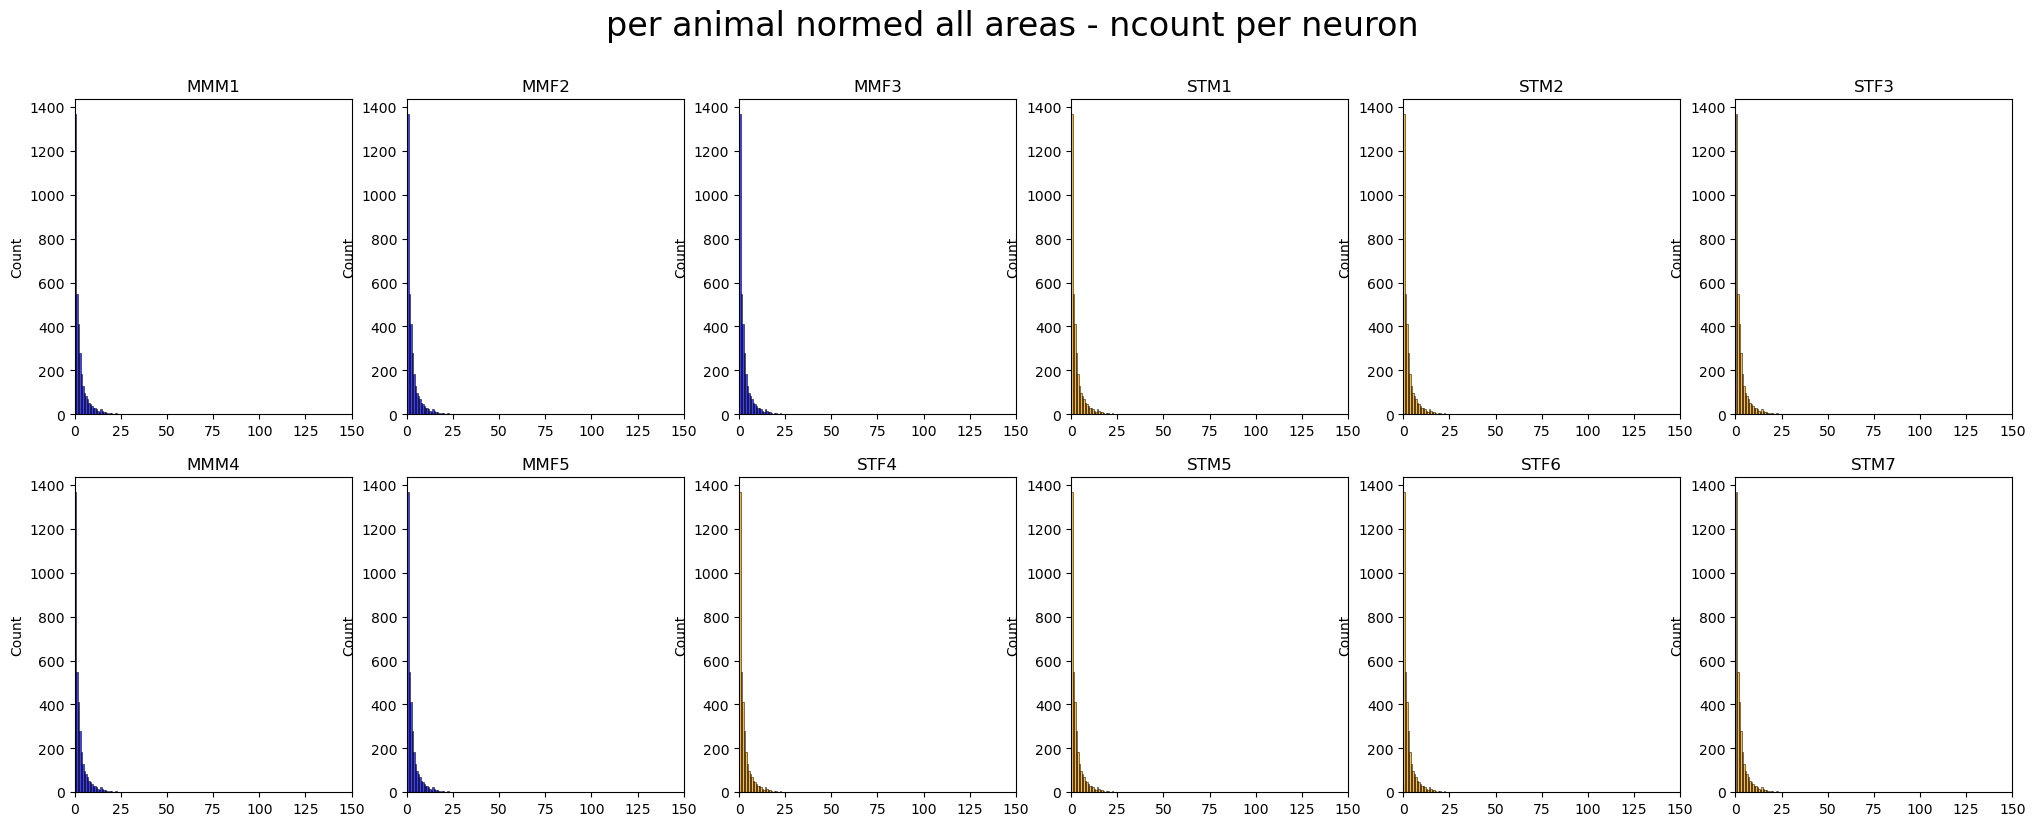

In [127]:
# left out type
fig, axs = plt.subplots(2,6, figsize=(25,9))
i=0
for ax in axs.flat:
    df = omc_clean[i].drop(["type"], axis=1)
    df = (df.T / df.OMCi).T # normalize to max row count
    # set cut-off for outliers at 5000
    df[df > 5000] = 5000

    # divide matrix by total BC counts
    total_bc = dfi.sum().sum()
    df = dfi/total_bc * 10000 # scale up so numbers are reasonable

    vals = df.values.flatten()
    idx = vals.nonzero()
    plot = vals[idx]
    if species[i] == "MMus":
        clr = "blue"
    elif species[i] == "STeg":
        clr="orange"
        

    # plot[plot > 5000] = 5000
    sns.histplot(plot, bins = 50, legend=False, color=clr, ax=ax)
    ax.set_title(mice[i])
    ax.set_xlim(0,150)
    i+=1
fig.suptitle("per animal normed all areas - ncount per neuron", size=24)
plt.show()

# heatmaps

Text(0.5, 1.0, 'mmus norm count')

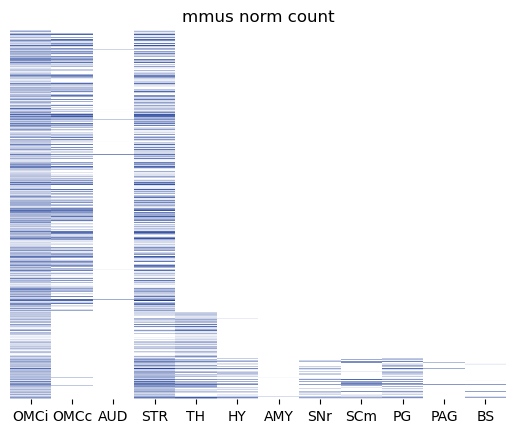

In [7]:
plot = omc_mm_all.sample(1000, random_state=10)
# sort by cell type
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)


sns.heatmap(plot.drop(['type'], axis=1), norm=LogNorm(), cmap=blue_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.title("mmus norm count")
# plt.savefig(out_path+"mm_single_heatmap.jpeg", dpi=300)

Text(0.5, 1.0, 'Steg ncounts')

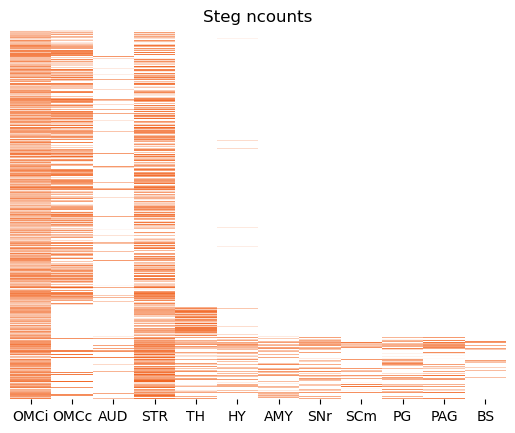

In [8]:
plot = omc_st_all.sample(1000, random_state=10)
# sort by cell type
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot.drop(['type'], axis=1), norm=LogNorm(), cmap=orange_cmp, cbar=False)
plt.gca().get_yaxis().set_visible(False)
plt.title("Steg ncounts")
# plt.savefig(out_path+"st_single_heatmap.jpeg", dpi=300)

# heatmaps of an individual animal

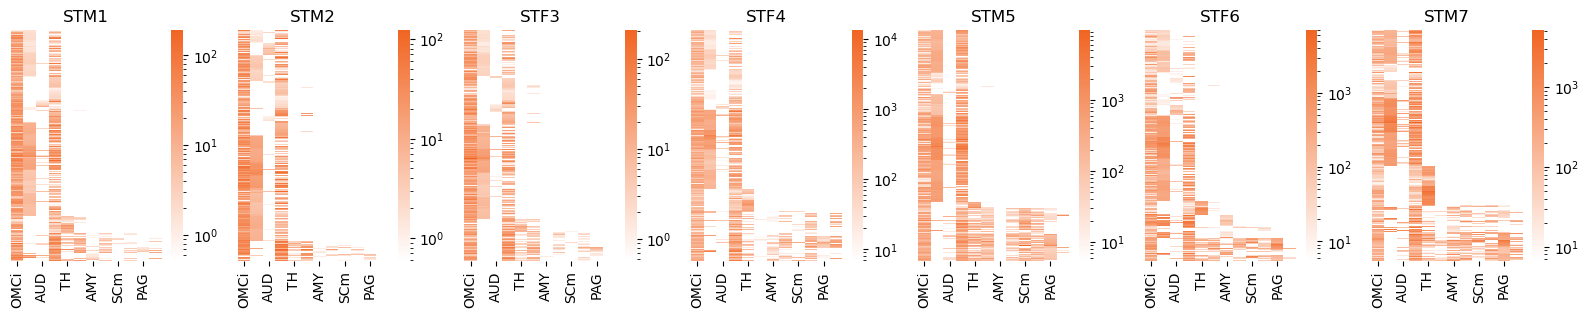

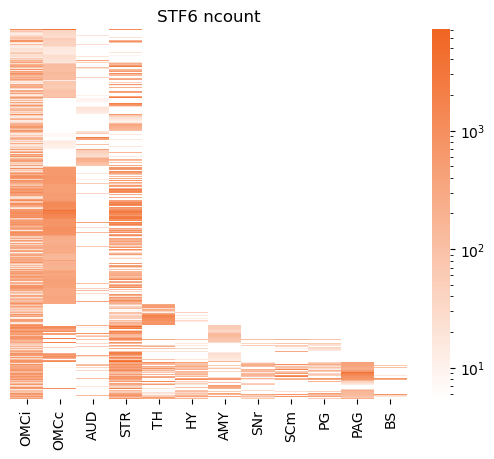

In [9]:
fig, axs = plt.subplots(1, len(omc_st), figsize=(20,3))

i=0
for ax in axs.flat:
    plot = omc_st[i]
    plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
    plot = plot.sort_values(by=['type']).reset_index(drop=True)
    sns.heatmap(plot.drop(['type'], axis=1), norm=LogNorm(), cmap=orange_cmp, ax=ax)
    ax.get_yaxis().set_visible(False)
    ax.set_title(mice_st[i])
    i+=1
    
# fig.savefig(out_path+"omc_st_N1_heatmaps.jpeg", dpi=300, bbox_inches="tight")
plt.show()

plot = omc_st[5]
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot.drop(['type'], axis=1), norm=LogNorm(), cmap=orange_cmp)
plt.gca().get_yaxis().set_visible(False)
plt.title(mice_st[5]+ " ncount")
# plt.savefig(out_path + "st_N1_n6454_heatmap.jpeg", dpi=300, bbox_inches="tight")
plt.show()

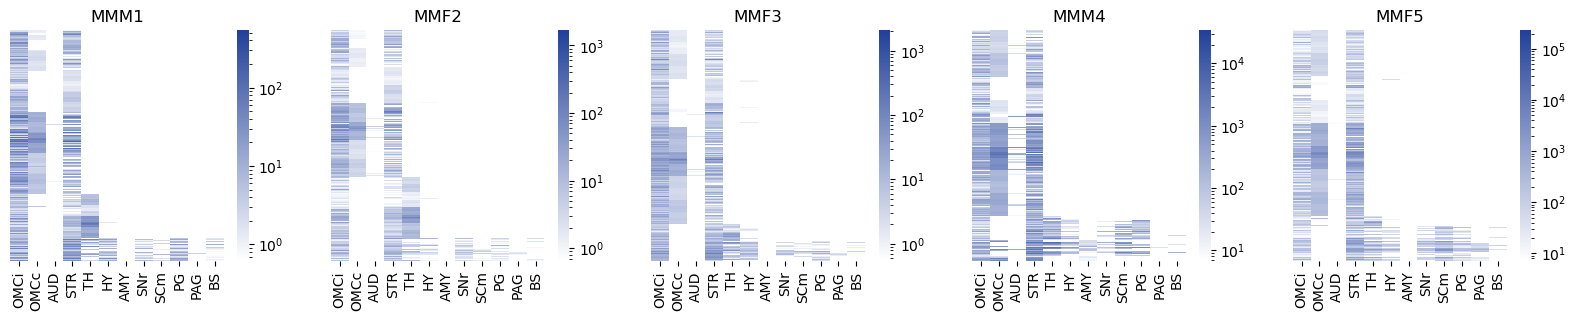

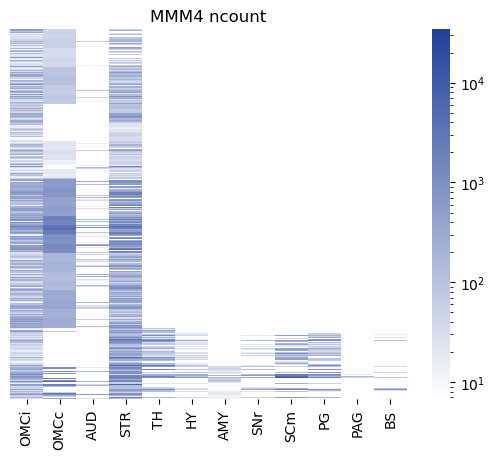

In [10]:
fig, axs = plt.subplots(1, len(omc_mm), figsize=(20,3))

i=0
for ax in axs.flat:
    plot = omc_mm[i]
    plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
    plot = plot.sort_values(by=['type']).reset_index(drop=True)
    sns.heatmap(plot.drop(['type'], axis=1), norm=LogNorm(), cmap=blue_cmp, ax=ax)
    ax.get_yaxis().set_visible(False)
    ax.set_title(mice_mm[i])
    i+=1
    
# fig.savefig(out_path+"omc_mm_N1_heatmaps.jpeg", dpi=300, bbox_inches="tight")
plt.show()

plot = omc_mm[3]
plot = plot.replace({"IT":0.25, "CT":0.5, "PT":0.75})
plot = plot.sort_values(by=['type']).reset_index(drop=True)

sns.heatmap(plot.drop(['type'], axis=1), norm=LogNorm(), cmap=blue_cmp)
plt.gca().get_yaxis().set_visible(False)
plt.title(mice_mm[3]+" ncount")
# plt.savefig(out_path + "MM_N1_n6454_heatmap.jpeg", dpi=300, bbox_inches="tight")
plt.show()

# summary plots

# histograms

In [56]:
def dfs_to_sums(df_list, drop=["OMCi", "type"], cell_type=None, mi=mice, sp=species, ds=dataset):
    """Output dataframe of ncount sums for each area in format that can be plotted with seaborn

    Args:
        df_list (list): 
            - List of dataframes of neurons/BC by areas, must be of num_samples size (12)
        drop (list, optional): 
            - Defaults to ["OMCi", "type"]
            - list of areas/columns to drop before calculating proportions
        cell_type (string, optional): 
            - Specify cell types in df, either IT, CT or PT
            - Defaults to None

    Returns:
        plot_df (pandas_dataframe):
            - returns dataframe in format for seaborn plotting
            - columns = areas, and other metadata
    """

    plot_df = pd.DataFrame(columns=["area", "sum", "mice", "species", "dataset"])

    if cell_type == "IT":
        drop = ["OMCi", 'TH', 'HY', 'AMY', 'SNr', 'SCm', 'PG',
       'PAG', 'BS']
    elif cell_type == "PT":
        drop = ["OMCi",'OMCc', 'AUD']

    # mice = []
    # species = []
    # dataset = []

    for i in range(len(df_list)):
        df = df_list[i].drop(drop, axis=1)
        bc_sum = df.sum()
        # proportion = bc_sum/df.shape[0]
        df_add = pd.DataFrame({"area":bc_sum.index.values, "sum":bc_sum.values, 
        "mice":mi[i], "species":sp[i], "dataset":ds[i]})
        plot_df = pd.concat([plot_df, df_add])
    
    return plot_df

In [51]:
mice_mm[3]
mmm4_sum = dfs_to_sums([omc_mm[3]])
mmm4_sum

,area,sum,mice,species,dataset
0,OMCc,2.173211e+06,MMM1,MMus,M194
1,AUD,8.564344e+04,MMM1,MMus,M194
2,STR,3.474742e+06,MMM1,MMus,M194
3,TH,3.808908e+05,MMM1,MMus,M194
4,HY,7.040793e+04,MMM1,MMus,M194
5,AMY,1.834256e+04,MMM1,MMus,M194
6,SNr,4.461934e+04,MMM1,MMus,M194
7,SCm,3.996676e+05,MMM1,MMus,M194
8,PG,2.223528e+05,MMM1,MMus,M194
9,PAG,5.272778e+03,MMM1,MMus,M194


<AxesSubplot: xlabel='area', ylabel='sum'>

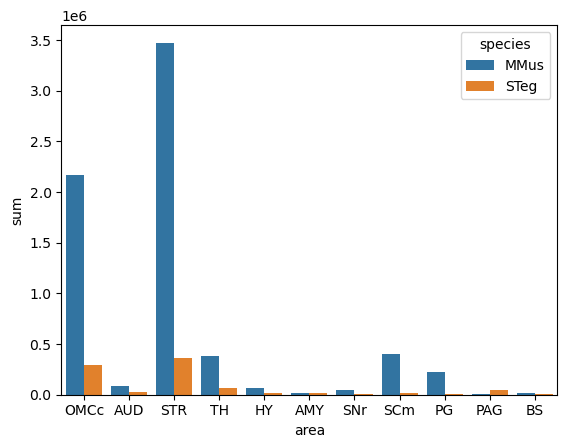

In [59]:
mm3_sum = dfs_to_sums([omc_mm[3]], mi=[mice_mm[3]], sp=["MMus"], ds=[dataset_mm[3]])
st5_sum = dfs_to_sums([omc_st[5]], mi=[mice_st[5]], sp=["STeg"], ds=[dataset_st[5]])
plot_df = pd.concat([mm3_sum, st5_sum]).reset_index(drop=True)
sns.barplot(plot_df,x="area", y="sum", hue="species")
# plot_df

In [92]:
areax = pd.unique(plot_df["area"])
plot_df = dfs_to_sums(omc_clean).reset_index()
plot_df.loc[127, "index"]


6

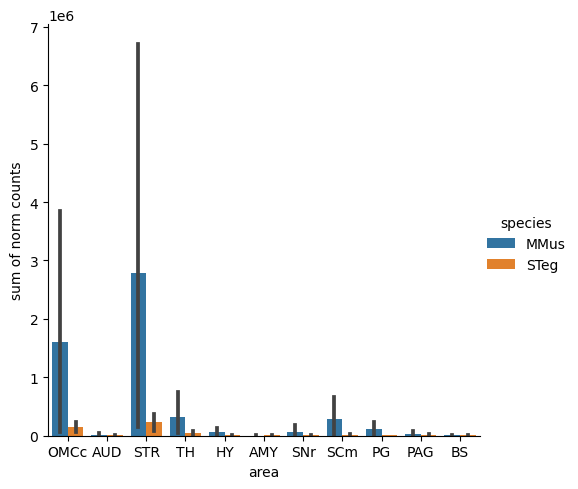

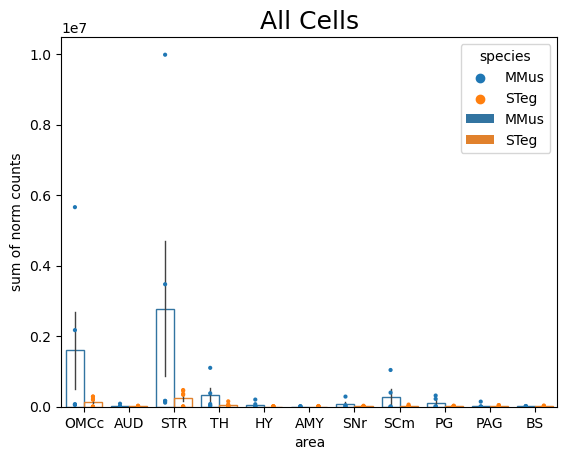

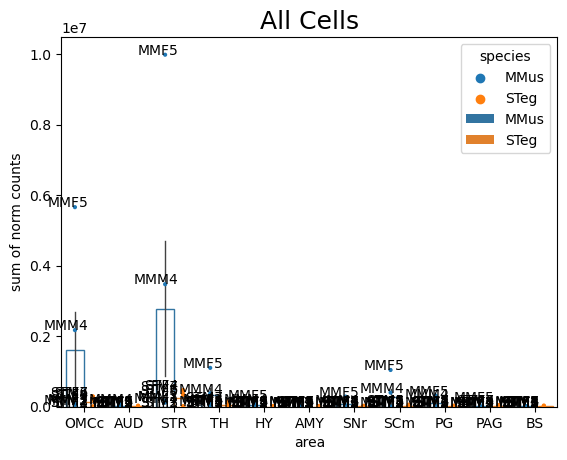

In [96]:
# create dataframe for plotting proportions
plot_df = dfs_to_sums(omc_clean).reset_index()

sns.catplot(plot_df, x="area", y="sum", hue="species", kind="bar")
plt.ylabel("sum of norm counts")
# plt.savefig(out_path + "all_hist_bar.jpeg", dpi=300, bbox_inches="tight")
plt.show()

dot_bar_plot(plot_df, "All Cells", xaxis="area", yaxis="sum", hueaxis="species")
plt.ylabel("sum of norm counts")
plt.show()


g = dot_bar_plot(plot_df, "All Cells", xaxis="area", yaxis="sum", hueaxis="species")
for i in range(plot_df.shape[0]):
    g.text(x=plot_df.loc[i,"index"]+0.1, y=plot_df.loc[i,"sum"]+0.001, s=plot_df.loc[i,"mice"], horizontalalignment='right', size='medium', color='black')
plt.ylabel("sum of norm counts")
plt.show(g)

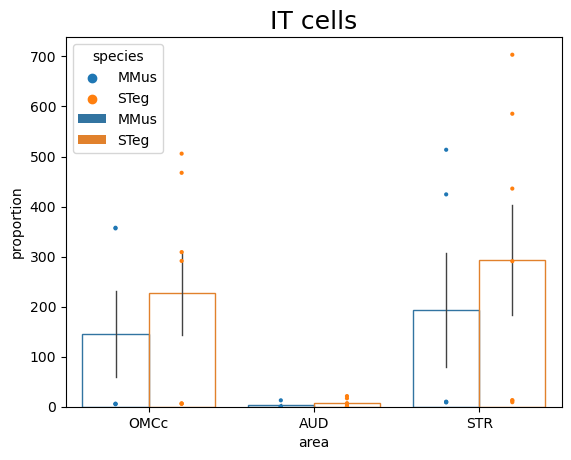

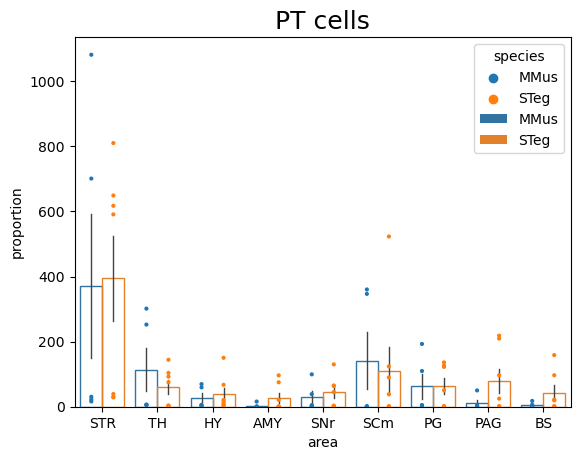

In [47]:
### IT

# create dataframe for plotting proportions
plot_df = dfs_to_proportions(omc_it, cell_type="IT")

dot_bar_plot(plot_df, "IT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()

### PT
# create dataframe for plotting proportions
plot_df = dfs_to_proportions(omc_pt, cell_type="PT")

dot_bar_plot(plot_df, "PT cells", xaxis="area", yaxis="proportion", hueaxis="species")
plt.show()

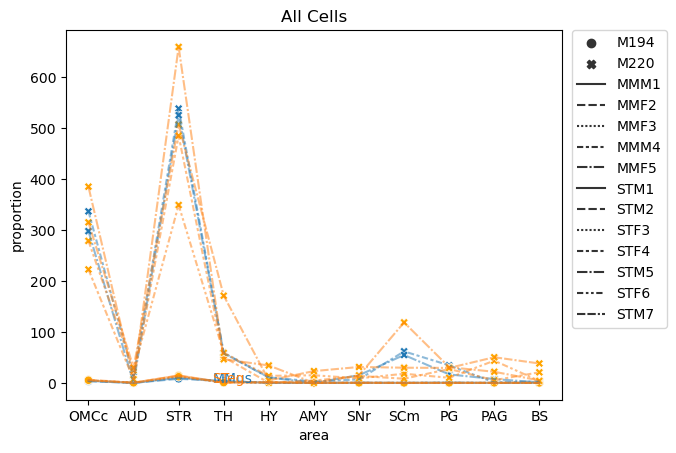

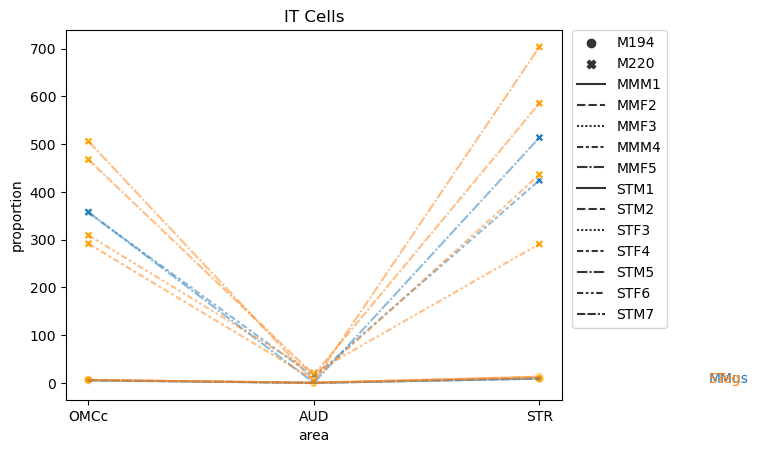

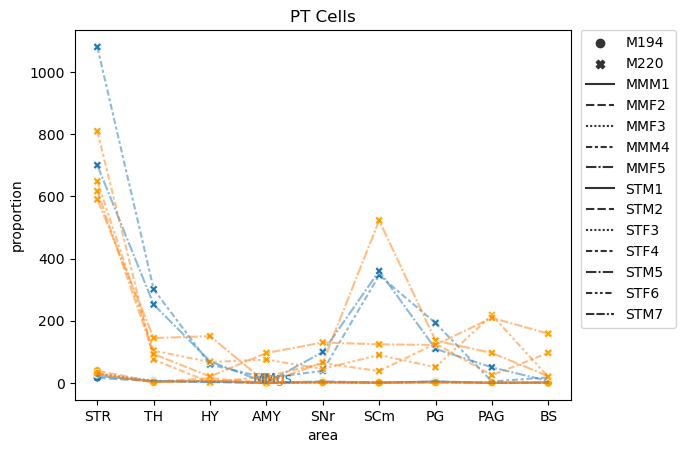

In [16]:
# all cells
plot_df = dfs_to_proportions(omc_clean)
plot_df = plot_df.rename(columns={'species':"Species", "dataset":"Dataset", 'mice':'mouse'})
individ_node_plot(plot_df, "All Cells", xaxis="area", yaxis="proportion")
plt.show()

# it cells
plot_df = dfs_to_proportions(omc_it, cell_type="IT")
plot_df = plot_df.rename(columns={'species':"Species", "dataset":"Dataset", 'mice':'mouse'})
individ_node_plot(plot_df, "IT Cells", xaxis="area", yaxis="proportion")
plt.show()

# pt cells
plot_df = dfs_to_proportions(omc_pt, cell_type="PT")
plot_df = plot_df.rename(columns={'species':"Species", "dataset":"Dataset", 'mice':'mouse'})
individ_node_plot(plot_df, "PT Cells", xaxis="area", yaxis="proportion")
plt.show()

# Dot Plots

In [17]:
it_OMC_proportions = []

# OMC proportions
for i in range(num_samples):
    total = omc_it[i].shape[0]
    prop = omc_it[i].sum()/total
    it_OMC_proportions.append(prop)


In [18]:
# dot plots for individual areas
areas = omc_it[0].columns

all_it_OMC_proportions = []
for area in areas:
    area_proportion = metadata[["mice", "species", "dataset"]]
    area_prop = []
    for i in range(num_samples):
        area_prop.append(it_OMC_proportions[i][area])

    area_proportion['proportion'] = area_prop
    
    all_it_OMC_proportions.append(area_proportion)

In [19]:
areasi = pd.Series(data=list(range(len(areas))), index=areas)
# areasi

In [20]:
# all_it_OMC_proportions

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


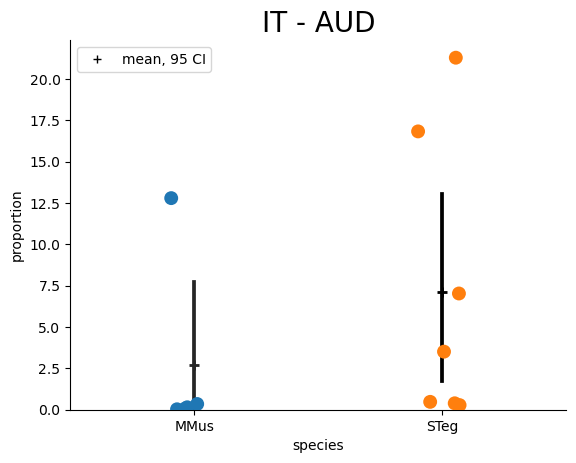

In [21]:
# AUD
i = areasi["AUD"]
fig, ax = plt.subplots()
df = all_it_OMC_proportions[i]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("IT - " + areas[i], size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


,mice,species,dataset,proportion
0,MMM1,MMus,M194,5.638817
1,MMF2,MMus,M194,4.928317
2,MMF3,MMus,M194,6.039147
3,STM1,STeg,M194,5.799093
4,STM2,STeg,M194,6.767245
5,STF3,STeg,M194,6.187494
6,MMM4,MMus,M220,356.397900
7,MMF5,MMus,M220,357.652571
8,STF4,STeg,M220,291.372041
9,STM5,STeg,M220,505.767544


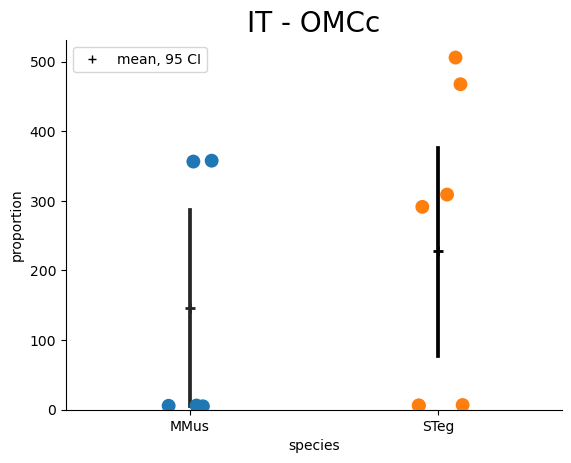

In [22]:
# OMCc
i = areasi["OMCc"]
fig, ax = plt.subplots()
df = all_it_OMC_proportions[i]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("IT - " + areas[i], size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])



df
# plt.savefig(out_path+"it_omcc_dotplot.jpeg", dpi=300, bbox_inches='tight')

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


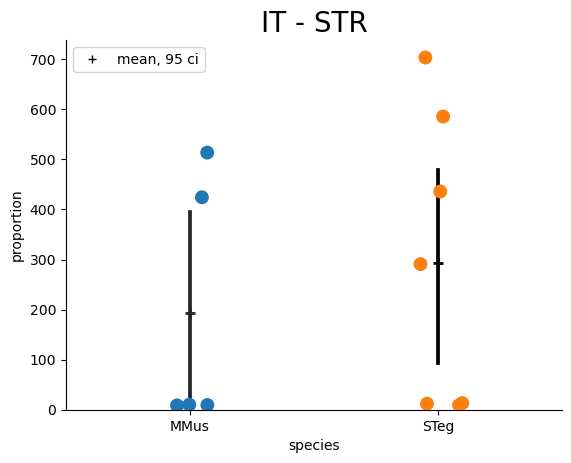

In [23]:
# STR
i = areasi["STR"]

fig, ax = plt.subplots()
df = all_it_OMC_proportions[i]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', 
                      color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("IT - " + areas[i], size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 ci")
plt.legend(handles=[test])


# plt.savefig(out_path+"it_STR_dotplot.jpeg", dpi=300, bbox_inches='tight')

In [24]:
pt_OMC_proportions = []

# OMC proportions
for i in range(num_samples):
    total = omc_pt[i].shape[0]
    prop = omc_pt[i].sum()/total
    pt_OMC_proportions.append(prop)


# dot plots for individual areas
areas = omc_pt[0].columns

all_pt_OMC_proportions = []
for area in areas:
    area_proportion = metadata[["mice", "species", "dataset"]]
    area_prop = []
    for i in range(num_samples):
        area_prop.append(pt_OMC_proportions[i][area])

    area_proportion['proportion'] = area_prop
    
    all_pt_OMC_proportions.append(area_proportion)

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


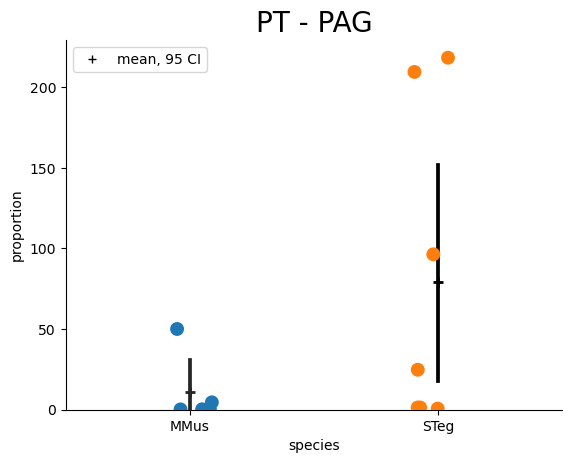

In [25]:
# PAG
i = areasi["PAG"]

fig, ax = plt.subplots()
df = all_pt_OMC_proportions[i]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("PT - " + areas[i], size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])

# plt.savefig(out_path+"pt_PAG_dotplot.jpeg", dpi=300, bbox_inches='tight')

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


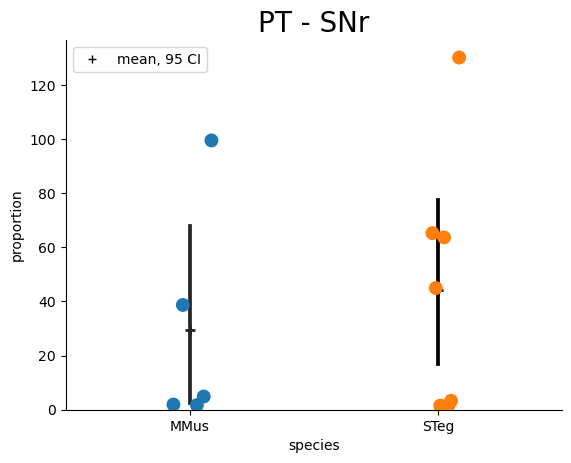

In [26]:
# SNr
i = areasi["SNr"]
fig, ax = plt.subplots()
df = all_pt_OMC_proportions[i]
strip = sns.stripplot(data=df, x="species", y="proportion", hue="species", size=10, ax=ax)
point = sns.pointplot(data=df, x="species", y="proportion", hue="species", units='mice', color='black', markers='+', ax=ax) # plots mean and 95 confidence interval:
plt.title("PT - " + areas[i], size=20)
plt.ylim((0)) # make sure y axis starts at 0
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(loc="upper left")
test = mlines.Line2D([], [], color="black", marker="+", linewidth=0, label="mean, 95 CI")
plt.legend(handles=[test])

# plt.savefig(out_path+"pt_SNr_dotplot.jpeg", dpi=300, bbox_inches='tight')

# Calculate probs?

In [27]:
# combine it/pt into one df
omc_mm_it_all = pd.concat(omc_it_mm)
omc_mm_pt_all = pd.concat(omc_pt_mm)
omc_st_it_all = pd.concat(omc_it_st)
omc_st_pt_all = pd.concat(omc_pt_st)


In [28]:
sim_reps = 1000
sim_sample_size=300

In [29]:
# create distribution by randomly sampling data
mm_it_probs = est_proj_prob(omc_mm_it_all, reps=sim_reps, sample_size=sim_sample_size)
    
# calculate fraction of projections in singing mice
st_it_probs = est_proj_prob(omc_st_it_all, reps=sim_reps, sample_size=sim_sample_size)

mm_it_probs = pd.DataFrame(mm_it_probs, columns=omc_mm_it_all.columns)
st_it_probs = pd.DataFrame(st_it_probs, columns=omc_st_it_all.columns)


In [30]:
# create distribution by randomly sampling data
mm_pt_probs = est_proj_prob(omc_mm_pt_all, reps=sim_reps, sample_size=sim_sample_size)
    
# calculate fraction of projections in singing mice
st_pt_probs = est_proj_prob(omc_st_pt_all, reps=sim_reps, sample_size=sim_sample_size)

mm_pt_probs = pd.DataFrame(mm_pt_probs, columns=omc_mm_pt_all.columns)
st_pt_probs = pd.DataFrame(st_pt_probs, columns=omc_st_pt_all.columns)


# try with t test
- parametric test between samples to calc pvalues

In [31]:
mmus_it_prop = []
steg_it_prop = []
for i in range(len(all_it_OMC_proportions)):
    df = all_it_OMC_proportions[i]
    mm = df[df["species"]=="MMus"]
    mmus_it_prop.append(mm["proportion"])
    st = df[df["species"]=="STeg"]
    steg_it_prop.append(st["proportion"])
mmus_it_array = np.array(mmus_it_prop)
steg_it_array = np.array(steg_it_prop)


In [32]:

# pd.set_option('display.max_rows', None)
results = stats.ttest_ind(mmus_it_array, steg_it_array, axis=1) # parametric
# results = stats.mannwhitneyu(mmus_it_array, steg_it_array, axis=1) # non-parametric test
p_vals = results[1]
plot = pd.DataFrame({"area":areas, "p-value":p_vals})

plot["mm_mean"] = mmus_it_array.mean(axis=1)
plot["st_mean"] = steg_it_array.mean(axis=1)
# plot["effect_size"] = (plot["st_mean"]-plot["mm_mean"]) / (plot["st_mean"] + plot["mm_mean"]) # modulation index
plot["fold_change"] = plot["st_mean"]/(plot["mm_mean"])
plot["log2_fc"] = np.log2(plot["fold_change"])
plot["nlog10_p"] = -np.log10(plot["p-value"])

# drop irrelevant rows
non_it = ["OB", "OMCi", "ACAi", "ACAc", "TH", "HY", "AMY", "HIP", "SNr", "SCm", "PG", "PAG", "BS"]
idx = plot["area"].isin(non_it)
plot = plot[~idx].reset_index(drop=True)


plot



,area,p-value,mm_mean,st_mean,fold_change,log2_fc,nlog10_p
0,OMCc,0.523147,146.131350,227.475418,1.556650,0.638445,0.281376
1,AUD,0.340098,2.677269,7.114494,2.657370,1.409999,0.468396
2,STR,0.553312,193.193688,292.839686,1.515783,0.600063,0.257030


Text(0, 0.5, '-log10(p-value)')

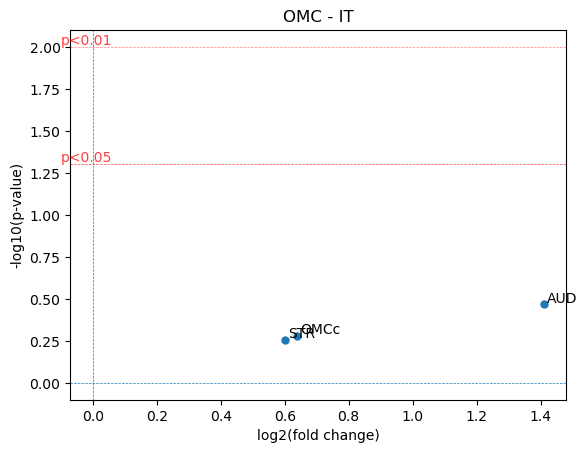

In [33]:

df = plot

x=df.log2_fc
y=df.nlog10_p

plt.scatter(x,y, s=25)
# plt.xlim([-1,1])
# plt.ylim([-0.1,4])
plt.axline((0, 0), (0, 1),linestyle='--', linewidth=0.5)
plt.axline((0, 0), (1, 0),linestyle='--', linewidth=0.5)
plt.axline((0, -np.log10(0.05)), (1,  -np.log10(0.05)),linestyle='--', color='r', alpha=0.75, linewidth=0.5)
plt.text(-0.1, -np.log10(0.05)+.015, 'p<0.05', color='r', alpha=0.75)
plt.axline((0, -np.log10(0.01)), (1,  -np.log10(0.01)),linestyle='--', color='r', alpha=0.5, linewidth=0.5)
plt.text(-0.1, -np.log10(0.01)+.015, 'p<0.01', color='r', alpha=0.75)


for i in range(df.shape[0]):
    plt.text(x=df.log2_fc[i]+0.01,y=df.nlog10_p[i]+0.01,s=df.area[i], 
          fontdict=dict(color='black',size=10))


plt.title("OMC - IT")
plt.xlabel('log2(fold change)')
plt.ylabel('-log10(p-value)')
# plt.savefig(out_path+'omc_it_volcano.jpg',dpi=300, bbox_inches='tight')
# plt.savefig(out_path+'omc_it_volcano.svg',dpi=300, bbox_inches='tight')

In [34]:
mmus_pt_prop = []
steg_pt_prop = []
for i in range(len(all_pt_OMC_proportions)):
    df = all_pt_OMC_proportions[i]
    mm = df[df["species"]=="MMus"]
    mmus_pt_prop.append(mm["proportion"])
    st = df[df["species"]=="STeg"]
    steg_pt_prop.append(st["proportion"])
mmus_pt_array = np.array(mmus_pt_prop)
steg_pt_array = np.array(steg_pt_prop)



In [35]:

# pd.set_option('display.max_rows', None)
results = stats.ttest_ind(mmus_pt_array, steg_pt_array, axis=1)
# results = stats.mannwhitneyu(mmus_it_array, steg_it_array, axis=1) # non-parametric test
p_vals = results[1]
plot = pd.DataFrame({"area":areas, "p-value":p_vals})

plot["mm_mean"] = mmus_pt_array.mean(axis=1)
plot["st_mean"] = steg_pt_array.mean(axis=1)
# plot["effect_size"] = (plot["st_mean"]-plot["mm_mean"]) / (plot["st_mean"] + plot["mm_mean"])
plot["fold_change"] = plot["st_mean"]/(plot["mm_mean"])
plot["log2_fc"] = np.log2(plot["fold_change"])
plot["nlog10_p"] = -np.log10(plot["p-value"])

# drop irrelevant rows
non_pt = ["OB", "OMCi", "ACAi", "ACAc", "HIP"]
idx = plot["area"].isin(non_pt)
plot = plot[~idx].reset_index(drop=True)

plot

,area,p-value,mm_mean,st_mean,fold_change,log2_fc,nlog10_p
0,OMCc,0.870098,67.932400,78.266625,1.152125,0.204297,0.060432
1,AUD,0.212962,3.330507,22.258203,6.683127,2.740523,0.671697
2,STR,0.920380,370.275764,394.984616,1.066731,0.093196,0.036033
3,TH,0.402093,114.225572,60.624992,0.530748,-0.913901,0.395673
4,HY,0.718689,28.271858,38.437319,1.359561,0.443141,0.143459
5,AMY,0.220009,3.254435,27.726695,8.519666,3.090797,0.657560
6,SNr,0.584763,29.335691,44.347647,1.511730,0.596201,0.233020
7,SCm,0.787104,141.949487,111.071571,0.782473,-0.353888,0.103968
8,PG,0.996449,62.946078,62.749774,0.996881,-0.004506,0.001545
9,PAG,0.164591,11.026280,78.917220,7.157194,2.839394,0.783595


Text(0, 0.5, '-log10(p-value)')

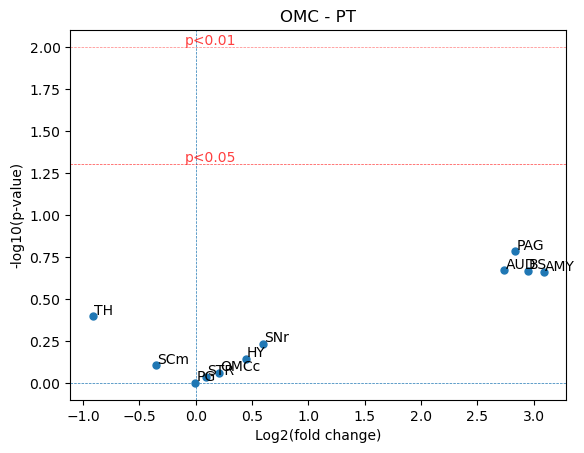

In [36]:





df = plot

x=df.log2_fc
y=df.nlog10_p

plt.scatter(x,y, s=25)
# plt.xlim([-1,1])
# plt.ylim([-0.1,4])
plt.axline((0, 0), (0, 1),linestyle='--', linewidth=0.5)
plt.axline((0, 0), (1, 0),linestyle='--', linewidth=0.5)
plt.axline((0, -np.log10(0.05)), (1,  -np.log10(0.05)),linestyle='--', color='r', alpha=0.75, linewidth=0.5)
plt.text(-0.1, -np.log10(0.05)+.015, 'p<0.05', color='r', alpha=0.75)
plt.axline((0, -np.log10(0.01)), (1,  -np.log10(0.01)),linestyle='--', color='r', alpha=0.5, linewidth=0.5)
plt.text(-0.1, -np.log10(0.01)+.015, 'p<0.01', color='r', alpha=0.75)


for i in range(df.shape[0]):
    plt.text(x=df.log2_fc[i]+0.01,y=df.nlog10_p[i]+0.01,s=df.area[i], 
          fontdict=dict(color='black',size=10))


plt.title("OMC - PT")
plt.xlabel('Log2(fold change)')
plt.ylabel('-log10(p-value)')
# plt.savefig(out_path+'omc_pt_volcano.jpg',dpi=300, bbox_inches='tight')
# plt.savefig(out_path+'omc_pt_volcano.svg',dpi=300, bbox_inches='tight')
